### Imports

### Splitting the data

In [1]:
# used for debugging
!pip install -Uqq ipdb
import ipdb
from google.colab import userdata
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!git clone https://github.com/MahdiTheGreat/LifeExpectancy.git
%cd LifeExpectancy

Cloning into 'LifeExpectancy'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 11), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 6.18 MiB | 7.41 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/LifeExpectancy


In [ ]:
%pdb on

Automatic pdb calling has been turned OFF


In [2]:
def list_printer(arr,text=None):
  if text:
   print(text+':')
  else:
    print(arr.__class__.__name__ + ':')
  for item in arr:
    print(item)
  print('---------------------------------------------------------\n')

### Problem 1

In [16]:
data= pd.read_csv("life_expectancy.csv")
data.rename(columns={'Life Expectancy at Birth, both sexes (years)':'LEB','Human Development Index (value)':'HDI'},inplace=True)

In [4]:
from IPython.display import display
import math
import seaborn as sns

def data_explorer(df,max_columns=60,max_rows = 20, display_func=display):

  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)
  break_line="------------------------------------------------"
  print('data sample:')
  display_func(df)
  print(break_line)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  display_func(df.info())
  print(break_line)
  # Check the general structure of the dataset
  print('data description:')
  display_func(df.describe())
  print(break_line)
  print('data nan check:')
  display_func(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

In [5]:
data_explorer(data)

data sample:


Country  Year  Mean Years of Schooling, female (years)  \
0     Afghanistan  1990                                 0.342503   
1     Afghanistan  1991                                 0.371860   
2     Afghanistan  1992                                 0.401218   
3     Afghanistan  1993                                 0.430575   
4     Afghanistan  1994                                 0.459933   
...           ...   ...                                      ...   
5548     Zimbabwe  2017                                 8.061880   
5549     Zimbabwe  2018                                 8.178377   
5550     Zimbabwe  2019                                 8.296558   
5551     Zimbabwe  2020                                 8.296558   
5552     Zimbabwe  2021                                 8.296558   

      Share of seats in parliament, male (% held by men)  \
0                                                   NaN    
1                                                   NaN    
2                                                   NaN    
3                                                   NaN    
4                                                   NaN    
...                                                 ...    
5548                                          63.848396    
5549                                          65.714286    
5550                                          65.428571    
5551                                          65.428571    
5552                                          65.428571    

      Mean Years of Schooling (years)  Inequality in income  \
0                            0.971125                   NaN   
1                            1.019356                   NaN   
2                            1.067586                   NaN   
3                            1.115817                   NaN   
4                            1.164047                   NaN   
...                               ...                   ...   
5548                         8.461690              27.01627   
5549                         8.585395              27.01627   
5550                         8.710909              28.76901   
5551                         8.710909              28.76901   
5552                         8.710909              28.76901   

      Carbon dioxide emissions per capita (production) (tonnes)  \
0                                              0.209727           
1                                              0.182525           
2                                              0.095233           
3                                              0.084285           
4                                              0.075054           
...                                                 ...           
5548                                           0.673026           
5549                                           0.821010           
5550                                           0.747610           
5551                                           0.708562           
5552                                           0.708562           

      Expected Years of Schooling, male (years)  \
0                                      3.939093   
1                                      4.171640   
2                                      4.417915   
3                                      4.678730   
4                                      4.954942   
...                                         ...   
5548                                  12.039037   
5549                                  12.154317   
5550                                  12.270700   
5551                                  12.270700   
5552                                  12.270700   

      Expected Years of Schooling (years)  \
0                                2.504050   
1                                2.806550   
2                                3.109050   
3                                3.411550   
4                                3.714050   
...                        

------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 50 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          5553 non-null   object 
 1   Year                                                                             5553 non-null   int64  
 2   Mean Years of Schooling, female (years)                                          5272 non-null   float64
 3   Share of seats in parliament, male (% held by men)                               5263 non-null   float64
 4   Mean Years of Schooling (years)                                                  5553 non-null   float64
 5   Inequality in income                                      

None

------------------------------------------------
data description:


Year  Mean Years of Schooling, female (years)  \
count  5553.000000                              5272.000000   
mean   2006.407527                                 7.329082   
std       9.032749                                 3.579831   
min    1990.000000                                 0.100000   
25%    1999.000000                                 4.310950   
50%    2007.000000                                 7.654927   
75%    2014.000000                                10.290678   
max    2021.000000                                14.136800   

       Share of seats in parliament, male (% held by men)  \
count                                        5263.000000    
mean                                           83.226805    
std                                            11.072464    
min                                            42.452830    
25%                                            76.666667    
50%                                            85.454545    
75%                                            91.489362    
max                                           100.000000    

       Mean Years of Schooling (years)  Inequality in income  \
count                      5553.000000           1805.000000   
mean                          7.721285             23.413150   
std                           3.271488             10.050090   
min                           0.290000              5.845034   
25%                           5.099206             16.433899   
50%                           7.853674             21.434030   
75%                          10.496898             28.662495   
max                          14.132150             68.337000   

       Carbon dioxide emissions per capita (production) (tonnes)  \
count                                        5548.000000           
mean                                            4.794938           
std                                             6.548047           
min                                             0.015895           
25%                                             0.632066           
50%                                             2.396968           
75%                                             6.700359           
max                                            68.723812           

       Expected Years of Schooling, male (years)  \
count                                5194.000000   
mean                                   12.246778   
std                                     3.015263   
min                                     2.633210   
25%                                    10.506366   
50%                                    12.357745   
75%                                    14.339810   
max                                    22.699820   

       Expected Years of Schooling (years)  \
count                          5553.000000   
mean                             12.144108   
std                               3.330159   
min                               2.059570   
25%                              10.132814   
50%                              12.393144   
75%                              14.500000   
max                              23.088921   

       Labour force participation rate, female (% ages 15 and older)  \
count                                        5300.000000               
mean                                           50.240731               
std                                            16.199127               
min                                             5.995000               
25%                                            41.119750               
50%                                            50.796000               
75%                                            60.301750               
max                                            90.555000               

       Population with at least some secondary education, female (% ages 25 and older)  \
count                                        5185.000000                           

------------------------------------------------
data nan check:


Country                                                                               0
Year                                                                                  0
Mean Years of Schooling, female (years)                                             281
Share of seats in parliament, male (% held by men)                                  290
Mean Years of Schooling (years)                                                       0
Inequality in income                                                               3748
Carbon dioxide emissions per capita (production) (tonnes)                             5
Expected Years of Schooling, male (years)                                           359
Expected Years of Schooling (years)                                                   0
Labour force participation rate, female (% ages 15 and older)                       253
Population with at least some secondary education, female (% ages 25 and older)     368
Expected Years of Schooling, female (years)                                         359
Adolescent Birth Rate (births per 1,000 women ages 15-19)                             0
Material footprint per capita (tonnes)                                              874
Mean Years of Schooling, male (years)                                               281
Population with at least some secondary education, male (% ages 25 and older)       367
Share of seats in parliament, female (% held by women)                              290
Inequality in eduation                                                             3588
Gender Development Index (value)                                                    677
Coefficient of human inequality                                                    3828
Labour force participation rate, male (% ages 15 and older)                         253
HDI                                                                                   0
Gross National Income Per Capita (2017 PPP$)                                          0
Total Population, as of 1 January (thousands)                                         0
Total Population, as of 1 July (thousands)                                            0
Male Population, as of 1 July (thousands)                                             0
Female Population, as of 1 July (thousands)                                           0
Population Density, as of 1 July (persons per square km)                              0
Population Sex Ratio, as of 1 July (males per 100 females)                            0
Median Age, as of 1 July (years)                                                      0
Natural Change, Births minus Deaths (thousands)                                       0
Rate of Natural Change (per 1,000 population)                                         0
Population Change (thousands)                                                         0
Population Growth Rate (percentage)                                                   0
Population Annual Doubling Time (years)                                            1488
Births (thousands)                                                                    0
Births by women aged 15 to 19 (thousands)                                             0
Crude Birth Rate (births per 1,000 population)                                        0
Total Fertility Rate (live births per woman)                                          0
Net Reproduction Rate (surviving daughters per woman)                                 0
Mean Age Childbearing (years)                                                         0
Sex Ratio at Birth (males per 100 female births)                                      0
Total Deaths (thousands)                                                              0
Male Deaths (thousands)                                                               0
Female Deaths (thousands)                                                             0
Crude Death Rate (deaths per 1,000 popul

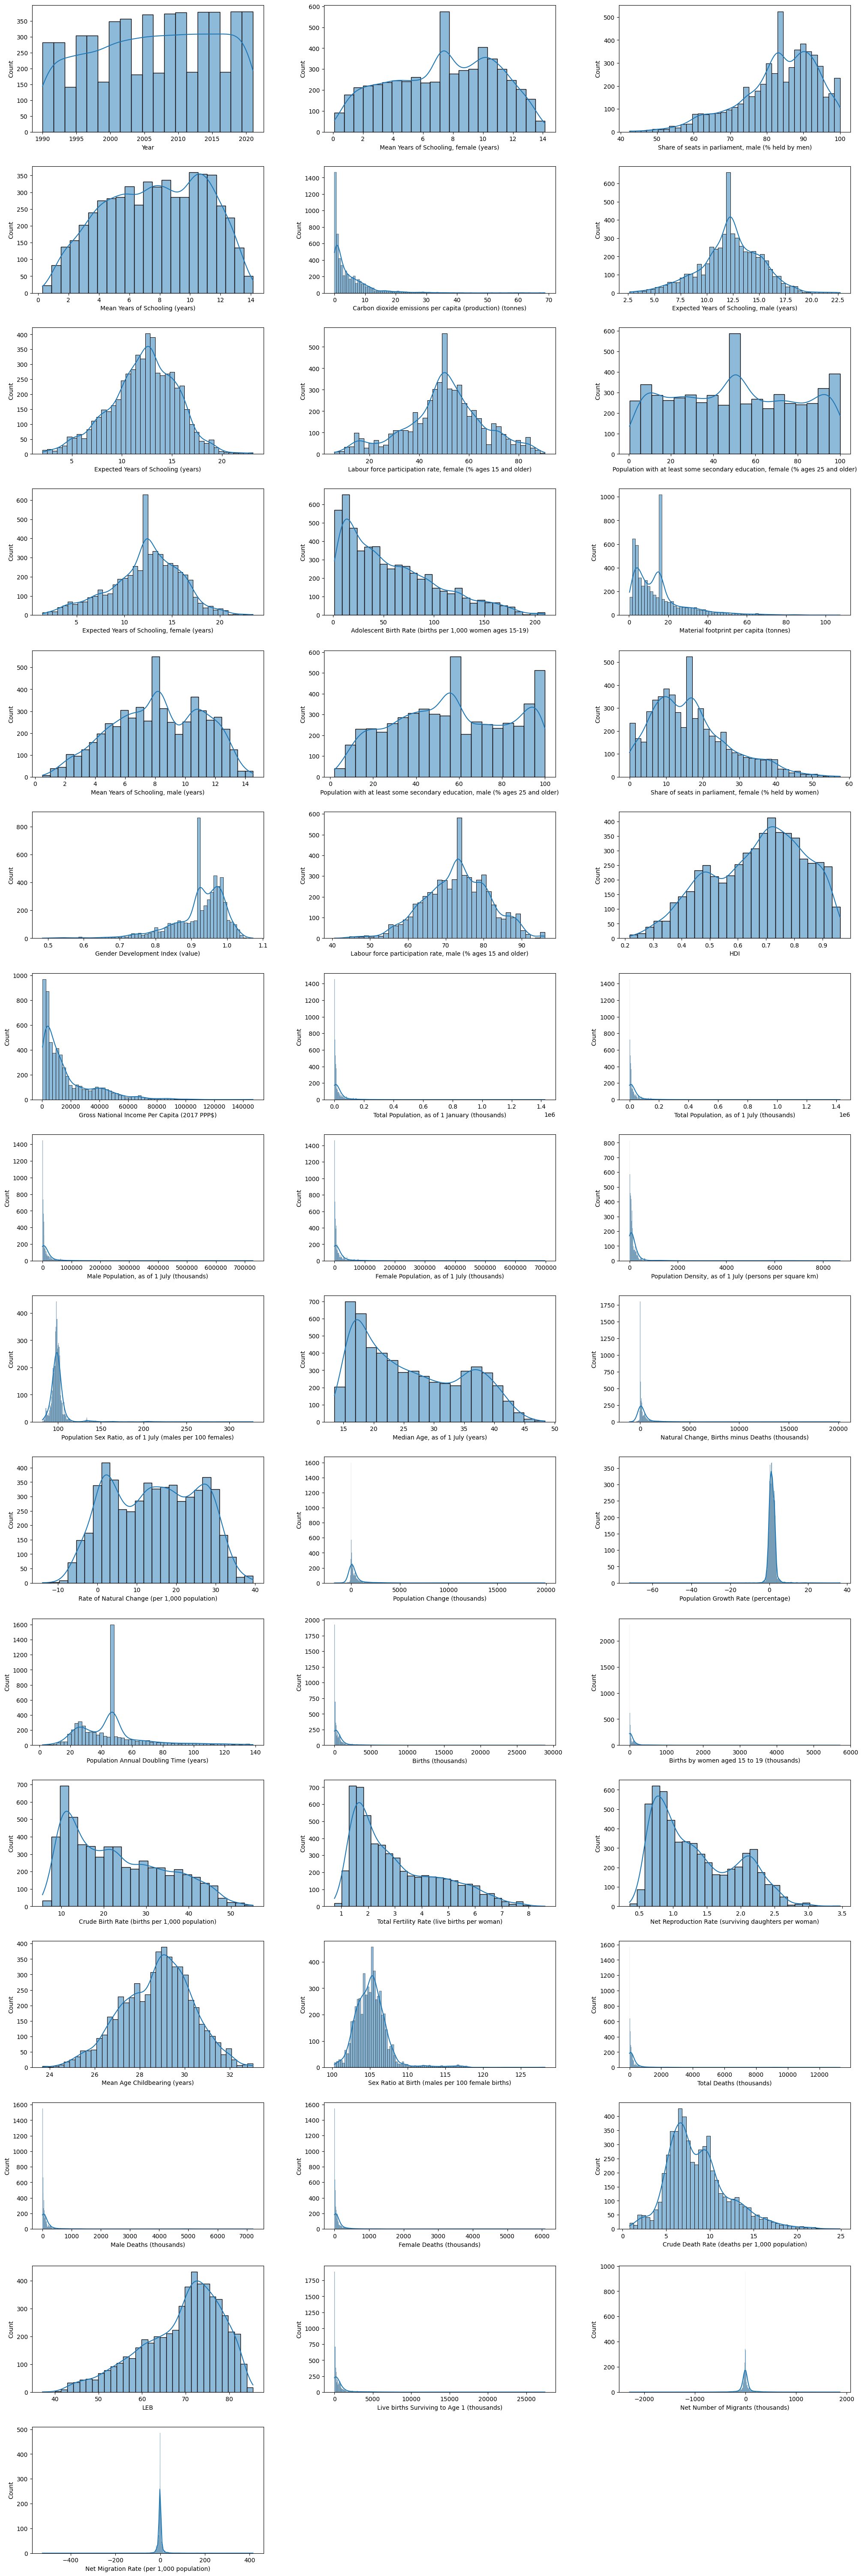

In [23]:
def data_histogram(df,figsize=(10, 15),histogram_fig_col=None,gridspec_kw={'wspace': 0.1, 'hspace': 0.1}):

   # Select numeric columns (integer and float types)
   numeric_columns = df.select_dtypes(include=['number']).columns

   # Calculate the square root of the number of plots to find the closest square layout
   if histogram_fig_col is None:
    cols = int(math.sqrt(len(numeric_columns)))  # Define the number of columns for the grid
   else:
    cols = histogram_fig_col
   rows = len(numeric_columns) // cols + (len(numeric_columns) % cols > 0)  # Calculate the number of rows needed

   # constrained_layout=True automatically adjusts layout
   fig, axes = plt.subplots(rows, cols, figsize=figsize,constrained_layout=True,gridspec_kw=gridspec_kw)
   fig_width, fig_height = fig.get_size_inches()

   # Flatten the axes array for easy iteration
   axes = axes.flatten()

   # Plotting each attribute in the grid
   for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], kde=True, ax=axes[i])
        #axes[i].set_title(column,fontsize=(fig_height * 2)/(rows+1))

   # Remove any unused subplots
   for j in range(i + 1, len(axes)):
       fig.delaxes(axes[j])

   axes.reshape(rows, cols)
   plt.show()

data_histogram(data,figsize=(20, 60),histogram_fig_col=3)

In [4]:
pearson_cm=data.corr(numeric_only=True,method='pearson')

In [6]:
# Get the correlation between different features
def correlation_heatmap(cm,figsize=(28,28),save_dir=None,name='Pearson Correlation of Features'):

    _ , ax = plt.subplots(figsize = figsize,constrained_layout=True)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        cm,
        cmap = colormap,
        square=True,
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
    )

    # Optionally, you can set the aspect ratio of the heatmap to make it more readable
    ax.set_aspect(aspect="auto")  # This adjusts the aspect ratio to fit the figure size
    plt.title(name, y=1.05, size=15)
    if save_dir:
      plt.savefig(save_dir, format='pdf')
    plt.show()

In [66]:
correlation_heatmap(pearson_cm)

In [17]:
from sklearn.model_selection import train_test_split
random_state = 42
test_size=0.2

In [18]:
max_corr_var= pearson_cm['LEB'].drop(['LEB']).abs().sort_values(ascending=False).idxmax()

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[max_corr_var],
    data['LEB'],
    test_size=test_size,
    random_state=random_state
)
X_train=X_train.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)
y_train=y_train.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)

### Problem 2

In [47]:
correlation_heatmap(pearson_cm[['LEB']].sort_values(ascending=False,by='LEB'),figsize=(5,10),name='LEB Pearson Correlation with other features',save_dir='LEB_corr.pdf')

<ipython-input-6-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
<ipython-input-6-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import pearsonr, spearmanr

lr = LinearRegression()
lr_reg=lr.fit(X=X_train,y=y_train)
print("the intercept: ", lr_reg.intercept_)
print("the model coefficients: ", lr_reg.coef_)
lr_pred=lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R2:',lr_reg.score(X_test,y_test))
p_correlation, _=pearsonr(lr_pred.flatten(),y_test.flatten())
print('ρ:',p_correlation)

the intercept:  [34.6046242]
the model coefficients:  [[51.42339338]]
MAE: 2.7534078859344597
MSE: 12.519251362188527
RMSE: 3.5382554122319276
R2: 0.8469620473438546
ρ: 0.920387001630666


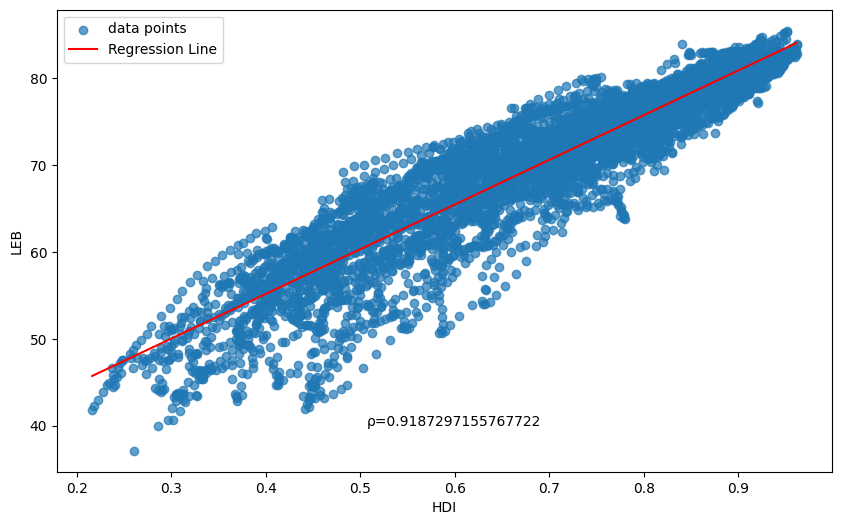

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(data['HDI'], data['LEB'], alpha=0.7,label='data points')
plt.xlabel('HDI')
plt.ylabel('LEB')

x_line = np.asarray([min(data['HDI']), max(data['HDI'])]).reshape(-1, 1)
y_line = lr.predict(x_line)
# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression Line')
hdi_leb_corr=pearson_cm['LEB']['HDI']
plt.annotate(f'ρ={hdi_leb_corr}',xy=(0.4,0.1),xycoords='axes fraction')
plt.legend(loc='best')
plt.savefig('LEB(HDI).pdf', format='pdf')
plt.show()

### Problem 3

In [23]:
spearman_cm=data.corr(numeric_only=True,method='spearman')
correlation_heatmap(spearman_cm[['LEB']].sort_values(ascending=False,by='LEB'),figsize=(5,10),name='LEB speaman Correlation with other features',save_dir='LEB_spearman_corr.pdf')


<ipython-input-6-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
<ipython-input-6-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


In [24]:
max_spearman_corr_var=spearman_cm['LEB'].drop(['LEB','HDI']).abs().idxmax()
print(max_spearman_corr_var)

Gross National Income Per Capita (2017 PPP$)


In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data[max_spearman_corr_var], data['LEB'], alpha=0.7,label='data points')
plt.xlabel(max_spearman_corr_var)
plt.ylabel('LEB')
# Plot the regression line
s_correlation=spearman_cm['LEB'][max_spearman_corr_var]
plt.annotate(f'ρ={s_correlation}',xy=(0.4,0.1),xycoords='axes fraction')
plt.legend(loc='best')
plt.savefig('LEB(GNI).pdf', format='pdf')
plt.show()

In [36]:
def find_best_transformation(X_var, y_var):
    transformations = {
        'original': X_var,
        'log': np.log(X_var + 1),     # Add 1 to avoid log(0)
        'sqrt': np.sqrt(X_var + 1),   # Add 1 to avoid sqrt(0)
        'inverse': 1 / (X_var + 1e-6), # Add small value to avoid division by zero
        'square': X_var ** 2,
        'cube': X_var ** 3,
    }
    results = []
    for name, transformed_var in transformations.items():
        # Remove infinite or NaN values
        mask = ~np.isinf(transformed_var) & ~np.isnan(transformed_var)
        transformed_var = transformed_var[mask]
        y_valid = y_var[mask]
        pearson_corr, _ = pearsonr(transformed_var, y_valid)
        results.append({'transformation': name, 'pearson_corr': pearson_corr})
    results_df = pd.DataFrame(results)
    return results_df

X_var = data[max_spearman_corr_var]
y_var = data['LEB']

transformation_results = find_best_transformation(X_var, y_var)
transformation_results['abs_pearson_corr'] = transformation_results['pearson_corr'].abs()

# Display the results
print("Transformation Results:")
print(transformation_results)

Transformation Results:
  transformation  pearson_corr  abs_pearson_corr
0       original      0.654701          0.654701
1            log      0.834026          0.834026
2           sqrt      0.765254          0.765254
3        inverse     -0.740854          0.740854
4         square      0.436661          0.436661
5           cube      0.279109          0.279109


In [37]:
# Find the transformation with the highest absolute Pearson correlation
best_transformation = transformation_results.loc[transformation_results['abs_pearson_corr'].idxmax()]

print(f"Best Transformation: {best_transformation['transformation']}")
print(f"Pearson Correlation after Transformation: {best_transformation['pearson_corr']:.4f}")

Best Transformation: log
Pearson Correlation after Transformation: 0.8340


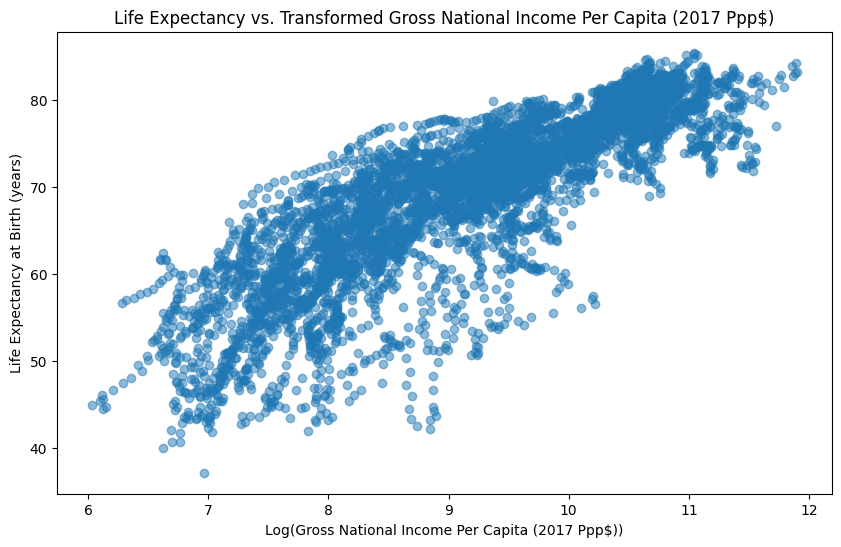

In [39]:
# Apply the best transformation
transformed_X_var = np.log(X_var + 1)

# Plot the transformed variable against the target
plt.figure(figsize=(10, 6))
plt.scatter(transformed_X_var, y_var, alpha=0.5)
plt.xlabel(f"{best_transformation['transformation'].title()}({max_spearman_corr_var.replace('_', ' ').title()})")
plt.ylabel('Life Expectancy at Birth (years)')
plt.title(f'Life Expectancy vs. Transformed {max_spearman_corr_var.replace("_", " ").title()}')
plt.savefig('births_leb_after.pdf', format='pdf')
plt.show()

### Problem 4

In [40]:
# Drop columns with more than 50% missing values
missing_percentage = data.isnull().mean() * 100
cols_to_drop = missing_percentage[missing_percentage > 50].index
data.drop(columns=cols_to_drop, inplace=True)
# Drop rows where the target variable is missing
data.dropna(subset=['LEB'], inplace=True)
# Impute missing values in numerical columns using the mean
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in set(data.isna().columns) and set(numerical_cols):
     data[col]=data[col].fillna(data[col].mean())

for col in set(data.isna().columns) - set(numerical_cols):
     data[col]=data[col].fillna(data[col].mode())
display(data.isna().sum())

Country                                                                            0
Year                                                                               0
Mean Years of Schooling, female (years)                                            0
Share of seats in parliament, male (% held by men)                                 0
Mean Years of Schooling (years)                                                    0
Carbon dioxide emissions per capita (production) (tonnes)                          0
Expected Years of Schooling, male (years)                                          0
Expected Years of Schooling (years)                                                0
Labour force participation rate, female (% ages 15 and older)                      0
Population with at least some secondary education, female (% ages 25 and older)    0
Expected Years of Schooling, female (years)                                        0
Adolescent Birth Rate (births per 1,000 women ages 15-19)                          0
Material footprint per capita (tonnes)                                             0
Mean Years of Schooling, male (years)                                              0
Population with at least some secondary education, male (% ages 25 and older)      0
Share of seats in parliament, female (% held by women)                             0
Gender Development Index (value)                                                   0
Labour force participation rate, male (% ages 15 and older)                        0
HDI                                                                                0
Gross National Income Per Capita (2017 PPP$)                                       0
Total Population, as of 1 January (thousands)                                      0
Total Population, as of 1 July (thousands)                                         0
Male Population, as of 1 July (thousands)                                          0
Female Population, as of 1 July (thousands)                                        0
Population Density, as of 1 July (persons per square km)                           0
Population Sex Ratio, as of 1 July (males per 100 females)                         0
Median Age, as of 1 July (years)                                                   0
Natural Change, Births minus Deaths (thousands)                                    0
Rate of Natural Change (per 1,000 population)                                      0
Population Change (thousands)                                                      0
Population Growth Rate (percentage)                                                0
Population Annual Doubling Time (years)                                            0
Births (thousands)                                                                 0
Births by women aged 15 to 19 (thousands)                                          0
Crude Birth Rate (births per 1,000 population)                                     0
Total Fertility Rate (live births per woman)                                       0
Net Reproduction Rate (surviving daughters per woman)                              0
Mean Age Childbearing (years)                                                      0
Sex Ratio at Birth (males per 100 female births)                                   0
Total Deaths (thousands)                                                           0
Male Deaths (thousands)                                                            0
Female Deaths (thousands)                                                          0
Crude Death Rate (deaths per 1,000 population)                                     0
LEB                                                                                0
Live births Surviving to Age 1 (thousands)                                         0
Net Number of Migrants (thousands)                                                 0
Net Migration Rate (per 1,000 population)                                          0
dtype

In [41]:
irrelevant_features=[
'Population Density, as of 1 July (persons per square km)'  ,
'Net Number of Migrants (thousands)'                        ,
'Net Migration Rate (per 1,000 population)'                 ,
'Population Sex Ratio, as of 1 July (males per 100 females)',
'Mean Age Childbearing (years)'                             ,
'Total Population, as of 1 January (thousands)'             ,
'Total Population, as of 1 July (thousands)'                ,
'Total Deaths (thousands)'                                  ,
'Live births Surviving to Age 1 (thousands)'                ,
'Births (thousands)'                                        ,
'Gender Development Index (value)',
'LEB',
'HDI']

In [42]:
import re
def protected_atts_finder(col):
  return bool(re.search(r'female|male|females|males|women|woman',col,re.IGNORECASE))
protected_atts = list(filter(protected_atts_finder,data.columns))
protected_atts.extend(['Country','Year'])
list_printer(protected_atts,'protected_atts')

protected_atts:
Mean Years of Schooling, female (years)
Share of seats in parliament, male (% held by men)
Expected Years of Schooling, male (years)
Labour force participation rate, female (% ages 15 and older)
Population with at least some secondary education, female (% ages 25 and older)
Expected Years of Schooling, female (years)
Adolescent Birth Rate (births per 1,000 women ages 15-19)
Mean Years of Schooling, male (years)
Population with at least some secondary education, male (% ages 25 and older)
Share of seats in parliament, female (% held by women)
Labour force participation rate, male (% ages 15 and older)
Male Population, as of 1 July (thousands)
Female Population, as of 1 July (thousands)
Population Sex Ratio, as of 1 July (males per 100 females)
Births by women aged 15 to 19 (thousands)
Total Fertility Rate (live births per woman)
Net Reproduction Rate (surviving daughters per woman)
Sex Ratio at Birth (males per 100 female births)
Male Deaths (thousands)
Female Deaths (th

In [43]:
relevant_features=list(set(data.columns)-set(irrelevant_features)-set(protected_atts))
list_printer(relevant_features,'general relevant features')

general relevant features:
Natural Change, Births minus Deaths (thousands)
Crude Birth Rate (births per 1,000 population)
Material footprint per capita (tonnes)
Rate of Natural Change (per 1,000 population)
Population Change (thousands)
Gross National Income Per Capita (2017 PPP$)
Population Growth Rate (percentage)
Mean Years of Schooling (years)
Expected Years of Schooling (years)
Carbon dioxide emissions per capita (production) (tonnes)
Crude Death Rate (deaths per 1,000 population)
Median Age, as of 1 July (years)
Population Annual Doubling Time (years)
---------------------------------------------------------



In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in relevant_features:
  if data[col].dtype == 'object':
    data[col] = label_encoder.fit_transform(data[col])

In [45]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    data[relevant_features],
    data['LEB'],
    test_size=test_size,
    random_state=random_state
)

In [58]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
ml_reg=mlr.fit(X=X_train_ml,y=y_train_ml)
print("the intercept: ", ml_reg.intercept_)
list_printer(text='the model coefficients:',arr=ml_reg.coef_)
ml_pred=mlr.predict(X_test_ml)
ml_p_correlation, _=pearsonr(ml_pred.flatten(),y_test.flatten())
print('ρ:',p_correlation)
print('MAE:', metrics.mean_absolute_error(y_test_ml, ml_pred))
print('MSE:', metrics.mean_squared_error(y_test_ml, ml_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_ml, ml_pred)))
print('R2:',reg.score(X_test_ml,y_test_ml))
print('ρ:',ml_p_correlation)

the intercept:  54.37933675576265
the model coefficients::
-0.0007374041866818834
-0.47056700551919983
0.02138070247906314
0.564598312761492
0.0006070049982329073
-1.1703128849738231e-05
-0.05526892626699601
-0.026429896744773747
0.1515945922963093
-0.12029844942991749
-1.0351653182805858
0.9750416293382567
-0.005276374995469634
---------------------------------------------------------

ρ: 0.920387001630666
MAE: 1.4502469782639542
MSE: 3.476265248790779
RMSE: 1.8644745235027425
R2: 0.957505404982008
ρ: 0.9785471289548632
